# Applied Statistics Assessment

This notebook contains solutions to the assessment set in the module Applied Statistics (Winter 25/26) at ATU.

In [40]:
import numpy as np                  # https://numpy.org
import matplotlib.pyplot as plt     # https://matplotlib.org
#plt.style.use('ggplot')
from scipy import stats             # https://docs.scipy.org
from scipy.stats import norm
import math
import itertools
import random

## Problem 1: Extending the Lady Tasting Tea

Let's extend the Lady Tasting Tea experiment as follows. The original experiment has 8 cups: 4 tea-first and 4 milk-first. Suppose we prepare 12 cups: 8 tea-first and 4 milk-first. A participant claims they can tell which was poured first.

Simulate this experiment using `numpy` by randomly shuffling the cups many times and calculating the probability of the participant correctly identifying all cups by chance. Compare your result with the original 8-cup experiment.

In your notebook, explain your simulation process clearly, report and interpret the estimated probability, and discuss whether, based on this probability, you would consider extending or relaxing the p-value threshold compared to the original design.

[Lady Tasting tea experiment - Numberphile](https://www.youtube.com/watch?v=8ERFV7rV0vg)

[Lady Tasting tea experiment - Rob Sinn](https://www.youtube.com/watch?v=kR1qeXDwCSc) 

[Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher) came up with the [null hypothesisis?](https://www.geeksforgeeks.org/maths/null-hypothesis/) 

Statistical analysis of A/B tests.

We can shuffle using numpy `shuffle` function ([see official documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.shuffle.html)).

[Generator shuffle](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html#numpy.random.Generator.shuffle)

p-value described [here](https://www.geeksforgeeks.org/machine-learning/p-value/)

`In general, a small p-value indicates that the observed data is unlikely to have occurred by random chance alone, which leads to the rejection of the null hypothesis.`

In [41]:
# Define the number of cups
num_cups = 12

# Define the number of cups with milk first
num_cups_milk_first = 4

# Define the number of cups with tea first
num_cups_tea_first = 8

We can make an array of numbers representing the 12 cups of tea.

In [42]:
cups = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

https://lisds.github.io/textbook/wild-pandas/fishers_tea.html

We will select 4 cups from the 12.

If there are 12 cups of tea, how many different ways are there of selecting 4 cups from them? "binomial coefficient? use `math.comb()`

https://www.geeksforgeeks.org/maths/n-choose-k-formula/

`Combination is described as the process of choosing one, two, or a few elements from a given sequence, independent of the order in which they appear.`

So Order doesnt matter.

But you can't pick the same cup more than once in this experiment.


So if we have 1 2 3 4 5 6 7 8 9 10 11 12 

and pick four for example like this 2 5 7 8, its the same as 5 7 2 8 as order doesn't matter

but if we select one, then there is 11 other cups to choose from then, not 12 anymore.

$ C(n, k) = \frac{n!}{k!(n-k)!} $
 
- n! is the factorial of n.
- k! is the factorial of k.


Putting that into Python code:

In [43]:
# Pick some example values
n = 12  # Total number of elements, here it is the total cups of tea
k = 4   # Number of elements to choose, here it is the 'milk-first' choices

# Calculate the number of ways of selecting k objects from n without replacement and without order
result = math.factorial(n) // (math.factorial(k) * math.factorial(n - k))

# Display result
result

495

We can use the [`math`](https://docs.python.org/3/library/math.html) library, specifically the [`comb`](https://docs.python.org/3/library/math.html#math.comb) function to do this for us.

In [44]:
# Calculate combinations using math.comb
result = math.comb(n, k)

# Print result
print(f"The number of ways to choose {k} elements from {n} is: {result}")

The number of ways to choose 4 elements from 12 is: 495


[`Itertools`](https://docs.python.org/3/library/itertools.html) has a function called [`combinations`](https://docs.python.org/3/library/itertools.html#itertools.combinations). It uses `math.comb()` under the hood.

- https://www.geeksforgeeks.org/python/python-itertools-combinations-function/

`itertools.combinations(iterable, r)`

`Return r length subsequences of elements from the input iterable.`

In [45]:
# Simple example of 3 elements, return all possible unordered pairs of elements
example = list(itertools.combinations("123", 2))

print(example)

[('1', '2'), ('1', '3'), ('2', '3')]


Now to use 12 cups, where we select 4

The `cups` list is the iterable, `num_cups_milk_first` is the number of subsequences to be selected from the iterable.

In [46]:
# Determine the different ways of selecting milk-first cups out of the total number of cups of tea
combinations = list(itertools.combinations(cups, num_cups_milk_first)) # 'cups' is the list of cup labels

# Print to console
#combinations

Those are all unique combinations (without thinking about the order of them), there is no repetition. There is 2,3,4,5 - you wont see 2,4,3,5. There are 495 rows as calculated by the formula in `results` above.

In [47]:
# Count the number of combinations
count = len(combinations)

# Print the count
print(f'Total number of combinations: {count}')

Total number of combinations: 495


Now the experiment bit. Shuffle the 12 cups, select 4 at random. We can use the [`random`](https://docs.python.org/3/library/random.html) module. It's a pseudo-random number generator.

Use a set instead of a list. Why? Set is unordered, lists are ordered.

- https://www.geeksforgeeks.org/python/sets-vs-lists-python/

In [48]:
# Select 4 at random, convert to a set in-line
milk_first = set(random.sample(cups, num_cups_milk_first))

# Display the set
milk_first

{1, 3, 8, 12}

It looks like it sorts them automatically in numerical order. We are using numbers as labels, the cups are not in any particular order.

So if we get {1, 6, 7, 11} it has zero overlap with {2, 5, 8, 10}. It has 100% overlap with {1, 6, 7, 11}.

Chances of selecting 4 correct cups from the 495 unique combinations?

In [49]:
probability = 1/495

probability

0.00202020202020202

### Simulate randomly selecting 4 cups as the 'milk-first' cups

In [50]:
# Say 1, 4, 5, 8 are the "correct" cups
correct_cups = {1,4,5,8}

# Define the number of simulations
num_trials = 10000

# Create an array to hold success counts for the simulation
success_count = 0

# Run the simulation
for i in range(num_trials):
    # Shuffle the cups randomly
    np.random.shuffle(cups)
    
    # Select the cups as milk-first
    selected_cups = random.sample(cups, k)
    
    # Check if the selected cups match the correct cups
    if set(selected_cups) == set(correct_cups):
        success_count += 1

# Calculate the probability
probability = success_count / num_trials

# Print results
print(f"Simulated Probability of correctly identifying all {k} cups by chance: {probability:.4f}")

Simulated Probability of correctly identifying all 4 cups by chance: 0.0024


Compared to original experiment, there is way less chance to randomly select the correct 4 cups, as there are way more combinations (495 vs original 70). 

interpreting p-value:

- https://en.fernandafperes.com.br/blog/phd-tastes-tea/

In [51]:
p_original = (1/70) * 100
print(f"Original: {p_original:.3f}%")

p_extended = (1/495) * 100
print(f"Extended: {p_extended:.3f}%")

Original: 1.429%
Extended: 0.202%


So maybe tighten the p-threshold because of the low probability of selecting 4 correct cups out of 495 combinations.

## Problem 2: Normal Distribution

Generate 100,000 samples of size 10 from the standard normal distribution. For each sample, compute the standard deviation with ddof=1 (sample SD) and with ddof=0 (population SD). Plot histograms of both sets of values on the same axes with transparency. Describe the differences you see. Explain how you expect these differences to change if the sample size is increased.

How to generate random numbers following a Normal Distribution using the `numpy.random.normal()` method:

- https://www.geeksforgeeks.org/numpy/normal-distribution-in-numpy/

Offical `nupmy` documentation found [here](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)

In [52]:
# Generate samples from the standard normal distribution
sample = np.random.normal(loc=0.0, scale=1.0, size=None)

# Display
sample

-1.0510517277092921

From the docs:

`loc`: Mean (“centre”) of the distribution.

`scale`: Standard deviation (spread or “width”) of the distribution. Must be non-negative.

`size`: Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn.


One sample was generated because supplied the size (shape) as None. We can give it a number of samples to generate.

In [53]:
# Define number of samples to generate
n_samples = 10

# Generate samples from the standard normal distribution
samples = np.random.normal(loc=0.0, scale=1.0, size=(n_samples))

# Display
samples

array([-0.51633786,  0.97327693, -0.30388979, -2.03319224, -1.44470912,
       -0.04055383,  0.17992258,  1.45785814,  0.26785238, -0.07872333])

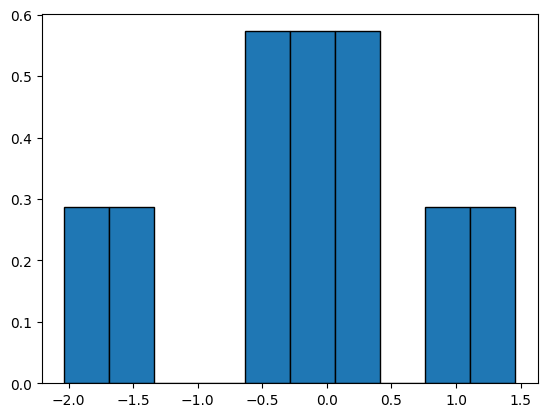

In [54]:
# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Plot histogram
ax.hist(samples, edgecolor='black', density=True)

# Display the plot
plt.show()

Now use a two-dimensional array, 100,000 x 10 .

We will get 100,000 rows and 10 columns of samples.

x-axis is continuous so we plot a histogram using matplotlib [`hist`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html).

note standard normal distribution means loc (mean) is zero and scale (std deviation) is 1

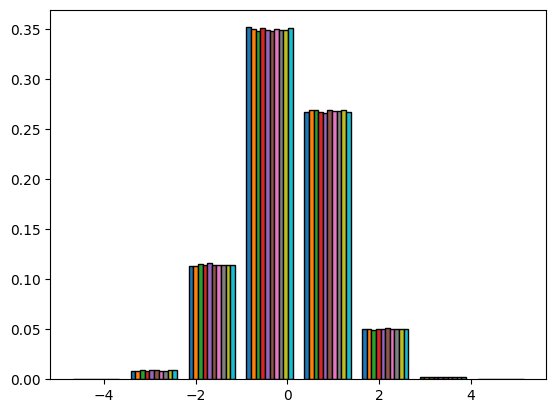

In [55]:
# Define number of samples to generate, and 
n_samples = 100000
sample_size = 10

# Generate samples from the standard normal distribution (ie loc is 0, scale is 1)
samples = np.random.normal(loc=0.0, scale=1.0, size=(n_samples, sample_size))

# Create a figure and axis for the plot.
fig, ax = plt.subplots()

# Plot the histogram.
ax.hist(samples, bins=8, edgecolor='black', density=True)

# Display the plot.
plt.show()

In [56]:
# you can check the mean of the samples and see it is 'loc'
print(round(np.mean(samples), 2))

0.0


From the `numpy` docs, using delta degrees of freedom (ddof).

We can calculate `population standard deviation` using `ddof=0`.

Likewise, we can calculate the `sample standard deviation` by setting `ddof=1`.

- https://numpy.org/doc/stable/reference/generated/numpy.std.html

- https://mathmonks.com/standard-deviation/population-and-sample-standard-deviation

`The population standard deviation represents the entire population of an area under consideration, such as a national census or during a financial report. Thus, it includes all individuals in a population.`

`The sample standard deviation estimates the standard deviation of a dataset, which is a subset of the population.`

In [57]:
# Calculate sample standard deviations (ddof=1)
sample_sd = np.std(samples, axis=1, ddof=1)

# Calculate population standard deviations (ddof=0)
population_sd = np.std(samples, axis=1, ddof=0)

Put both on same plot

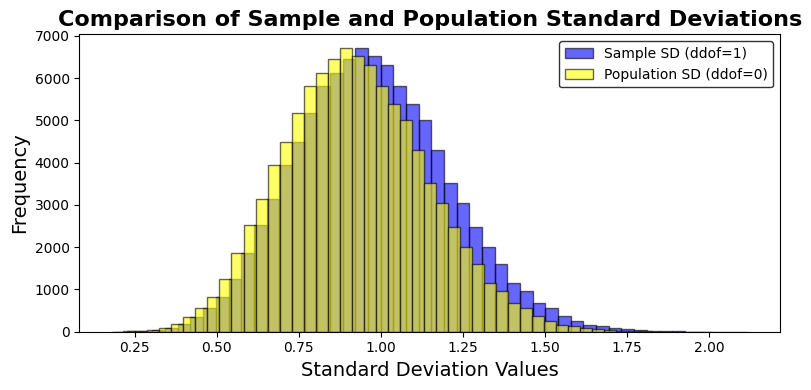

In [58]:
# Create a figure and axis for the plot.
fig, ax = plt.subplots(figsize=(8, 4))

# Plot histograms for sample and population standard deviations.
ax.hist(sample_sd, bins=50, alpha=0.6, label='Sample SD (ddof=1)', color='blue', edgecolor='black')
ax.hist(population_sd, bins=50, alpha=0.6, label='Population SD (ddof=0)', color='yellow', edgecolor='black')

# Add titles and labels.
ax.set_title('Comparison of Sample and Population Standard Deviations', fontsize=16, fontweight='bold')
ax.set_xlabel('Standard Deviation Values', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)

# Add a legend with a transparent background.
ax.legend(frameon=True, facecolor='white', edgecolor='black')

# Display the plot.
plt.tight_layout()

If we use a larger sample size?

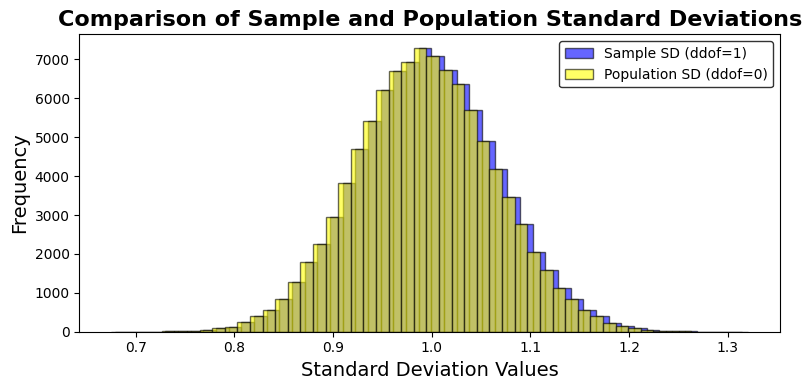

In [59]:
# Define number of samples to generate, and 
n_samples = 100000
sample_size = 100

# Generate samples from the standard normal distribution
samples = np.random.normal(loc=0.0, scale=1.0, size=(n_samples, sample_size))

# Calculate sample standard deviations (ddof=1)
sample_sd = np.std(samples, axis=1, ddof=1)

# Calculate population standard deviations (ddof=0)
population_sd = np.std(samples, axis=1, ddof=0)

# Create a figure and axis for the plot.
fig, ax = plt.subplots(figsize=(8, 4))

# Plot histograms for sample and population standard deviations.
ax.hist(sample_sd, bins=50, alpha=0.6, label='Sample SD (ddof=1)', color='blue', edgecolor='black')
ax.hist(population_sd, bins=50, alpha=0.6, label='Population SD (ddof=0)', color='yellow', edgecolor='black')

# Add titles and labels.
ax.set_title('Comparison of Sample and Population Standard Deviations', fontsize=16, fontweight='bold')
ax.set_xlabel('Standard Deviation Values', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)

# Add a legend with a transparent background.
ax.legend(frameon=True, facecolor='white', edgecolor='black')

# Display the plot.
plt.tight_layout()

The distributions appear to overlap more as the sample size increases.

- A larger sample size will result in the sample distribution being closer to or tighter around the population mean of the original distribution

standard deviation decreases (still centered on the same mean) as sample size increases, you getting a more accurate estimate of the population mean

something about the central limit theorem

Now add the bell curve to the plot. 


### Probability Density Function

$ f(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x - \mu)^2}{2 \sigma^2}} $

https://en.wikipedia.org/wiki/Normal_distribution

We should convert the y-values to probablility density:

- https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html

This returns `a probability density: each bin will display the bin's raw count divided by the total number of counts`

The histogram is normalised so that the area under the histogram sums to 1. The height of each bin represents the probability density, rather than raw counts.

Try with just one distribution first, sample_sd:

Generate random number using [`Generator`](https://numpy.org/doc/stable/reference/random/index.html#random-quick-start)

standard error, used for plotting the curve

- https://en.wikipedia.org/wiki/Standard_error

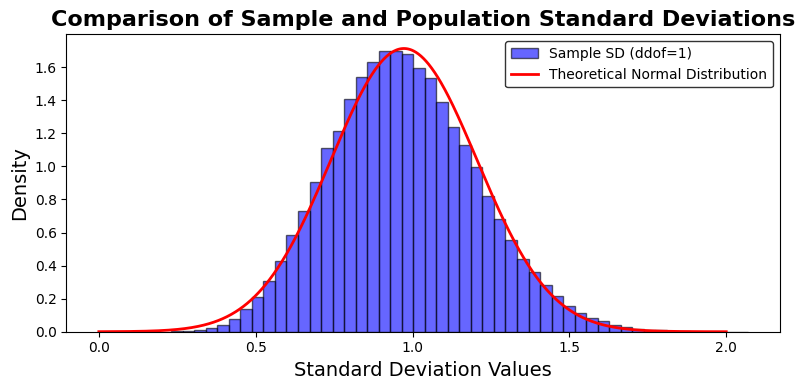

In [60]:
# This function is from Ians notebook 'normal-distribution.ipynb' this calculates the PDF of a normal (Gaussian) distribution.
def f(x, mu=0.0, sigma=1.0):
  # The normalisation constant.
  norm = 1.0 / np.sqrt(2.0 * np.pi * sigma**2)
  
  # f(x)
  return norm * np.exp(-(x - mu)**2 / (2.0 * sigma**2))

# Define number of samples to generate
n_samples = 100000
sample_size = 10

# Create a Generator instance, for random numbers
rng = np.random.default_rng()

# Generate samples from the standard normal distribution using the Generator instance
samples = rng.normal(loc=0.0, scale=1.0, size=(n_samples, sample_size))

# Calculate sample standard deviations (ddof=1)
sample_sd = np.std(samples, axis=1, ddof=1)

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(8, 4))

# Plot histogram for sample standard deviations with normalisation using Density=True.
ax.hist(sample_sd, bins=50, alpha=0.6, label='Sample SD (ddof=1)', color='blue', edgecolor='black', density=True)

# Add titles and labels.
ax.set_title('Comparison of Sample and Population Standard Deviations', fontsize=16, fontweight='bold')
ax.set_xlabel('Standard Deviation Values', fontsize=14)
ax.set_ylabel('Density', fontsize=14)

# Define the theoretical normal distribution for the sample standard deviations.
mu = np.mean(sample_sd)  # Mean of the sample SD
sigma = np.std(sample_sd, ddof=1) / np.sqrt(n_samples)  # Standard error of the sample SD

# Create an x range for the theoretical curve.
x = np.linspace(0, 2, 1000)

# Get y values.
y = f(x, mu=np.mean(sample_sd), sigma = np.std(sample_sd, ddof=1)) 

# Plot the theoretical curve.
ax.plot(x, y, 'r-', label='Theoretical Normal Distribution', linewidth=2)

# Add legend.
ax.legend(frameon=True, facecolor='white', edgecolor='black')

# Display the plot.
plt.tight_layout()
plt.show()

We cna use `scipy.stats` to perform normalisation for calculating the probability density function (PDF) of a normal distribution

The `norm.pdf` function calculates the PDF using the normalisation constant and the exponential factor.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

https://www.geeksforgeeks.org/python/how-to-calculate-probability-in-a-normal-distribution-given-mean-and-standard-deviation-in-python/

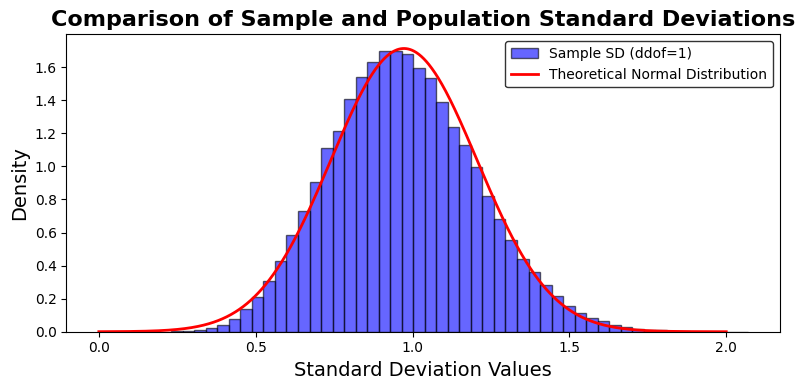

In [61]:
# Calculate mean (mu) and standard deviation (sigma) of sample SDs.
mu = np.mean(sample_sd)  # Mean of sample SD
sigma = np.std(sample_sd, ddof=1)  # Standard deviation of sample SD

# Create a figure and axis for the plot.
fig, ax = plt.subplots(figsize=(8, 4))

# Plot histogram for sample standard deviations with normalisation.
ax.hist(sample_sd, bins=50, alpha=0.6, label='Sample SD (ddof=1)', color='blue', edgecolor='black', density=True)

# Add titles and labels.
ax.set_title('Comparison of Sample and Population Standard Deviations', fontsize=16, fontweight='bold')
ax.set_xlabel('Standard Deviation Values', fontsize=14)
ax.set_ylabel('Density', fontsize=14)

# Create an x range for the theoretical curve.
x = np.linspace(0, 2, 1001)

# Use scipy to get the theoretical PDF values.
y = norm.pdf(x, loc=mu, scale=sigma)  # PDF for a normal distribution

# Plot the theoretical PDF curve.
ax.plot(x, y, 'r-', label='Theoretical Normal Distribution', linewidth=2)

# Add legend.
ax.legend(frameon=True, facecolor='white', edgecolor='black')

# Display the plot.
plt.tight_layout()
plt.show()

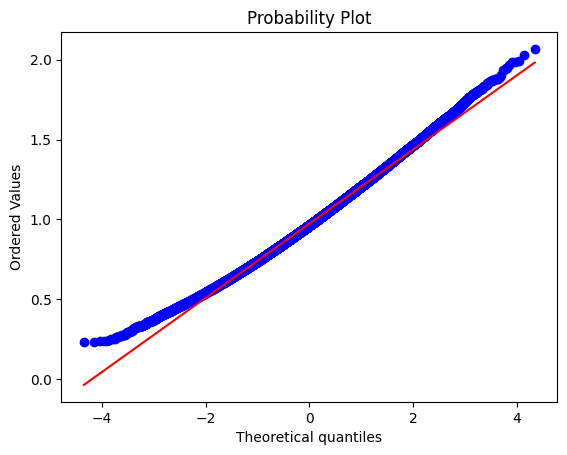

In [62]:
# Create an empty plot.
fig, ax = plt.subplots()

# Create a q-q plot.
stats.probplot(sample_sd, dist='norm', plot=ax);

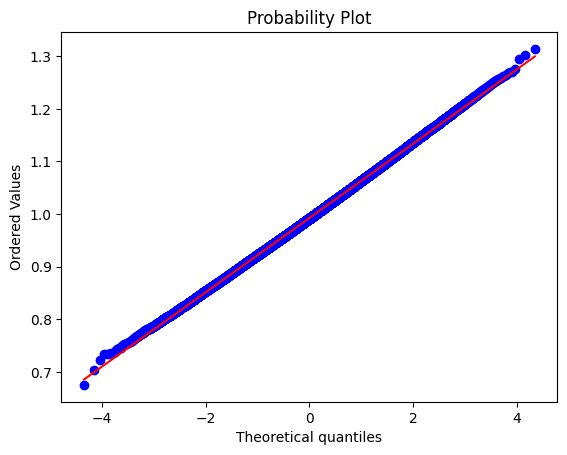

In [63]:
# Create an empty plot.
fig, ax = plt.subplots()

# Create a q-q plot.
stats.probplot(population_sd, dist='norm', plot=ax);

## Problem 3: t-Tests

A type II error occurs when a test fails to reject the null hypothesis even though it is false. For each mean difference `d = 0, 0.1, 0.2, … , 1.0`, repeat the following simulation 1,000 times:

1. Draw two samples of size 100, one from the standard normal distribution and one from the normal distribution with mean `d` and standard deviation 1.
2. Run an independent samples t-test on the two samples, rejecting the null hypothesis if the p-value is less than 0.05.
Record the proportion of times the null hypothesis is not rejected.
3. Plot this proportion against `d`, and explain how the type II error rate changes as the difference in means increases.

A type II error is a false negative.

- https://en.wikipedia.org/wiki/Type_I_and_type_II_errors

https://www.geeksforgeeks.org/maths/t-test-in-statistics/

In [64]:
# generate values using numpy from 0 to 1.0 with an incrememt of 1.0.
mean_differences = np.arange(0, 1.0, 0.1)

# define number of simulations.
n_simulations = 1000

In [65]:
# try with one value first
d = 0.5

Now to draw two samples of size 100

In [66]:
# Number of samples
n_samples = 100

# standard normal dist
sample_1 = np.random.normal(loc=0, scale=1, size=n_samples)

# normal distribution (loc is the mean of the normal distribution remember)
sample_2 = np.random.normal(loc=d, scale=1, size=n_samples) 

Do some plotting:

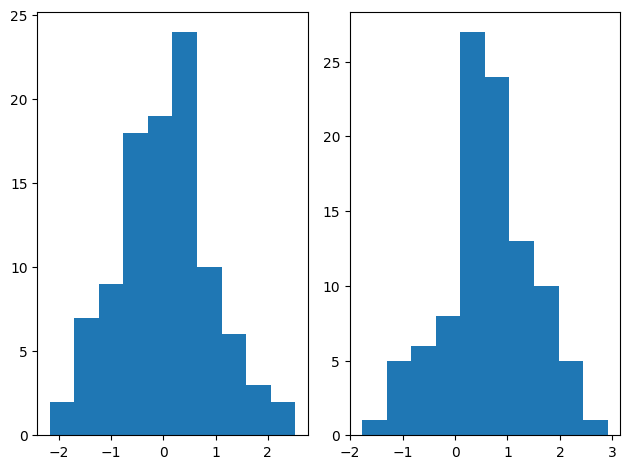

In [67]:
# Plot histograms
plt.subplot(1, 2, 1)
plt.hist(sample_1)

plt.subplot(1, 2, 2)
plt.hist(sample_2)

# Display the plot.
plt.tight_layout()

The `scipy.stats.ttest_ind` function can be used to conduct an independent samples t-test, returning the t-statistic and p-value.

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

From the SciPy docs:

> The t-test quantifies the difference between the arithmetic means of the two samples. The p-value quantifies the probability of observing as or more extreme values assuming the null hypothesis, that the samples are drawn from populations with the same population means, is true. A p-value larger than a chosen threshold (e.g. 5% or 1%) indicates that our observation is not so unlikely to have occurred by chance. Therefore, we do not reject the null hypothesis of equal population means. If the p-value is smaller than our threshold, then we have evidence against the null hypothesis of equal population means.


> This is a test for the null hypothesis that 2 independent samples have identical average (expected) values.


Can be used to check if for example two groups of data are statistically different from each other eg deos one  machine learning algorithm perform better than another

- https://pythonguides.com/python-scipy-ttest_ind/

It can help identify is something is statistically relevent or if it is something that happened by chance.

In [68]:
# Run t-test
t_statistic, p_value = stats.ttest_ind(sample_1, sample_2)

print(t_statistic, p_value)

-5.1092399546290475 7.586702390949744e-07


Now do for all in d list

In [69]:
for d in mean_differences:
    # standard normal dist
    sample_1 = np.random.normal(loc=0, scale=1, size=n_samples)

    # normal distribution (loc is the mean of the normal distribution remember)
    sample_2 = np.random.normal(loc=d, scale=1, size=n_samples) 

    # do the test
    t_statistic, p_value = stats.ttest_ind(sample_1, sample_2)

    print(f'T-statistic: {t_statistic}, p-value: {p_value}')

T-statistic: 0.3011179325950027, p-value: 0.7636405478976586
T-statistic: -1.966948883434742, p-value: 0.05058603991577807
T-statistic: -2.49090988723055, p-value: 0.013563920861118177
T-statistic: -0.7217834019523208, p-value: 0.47127916348104215
T-statistic: -2.403535883789821, p-value: 0.017159510532249907
T-statistic: -2.6036207548425563, p-value: 0.009923276183913816
T-statistic: -4.1780053250805, p-value: 4.408636406670442e-05
T-statistic: -4.083445327871346, p-value: 6.437509926811228e-05
T-statistic: -7.378879365821259, p-value: 4.299728049196364e-12
T-statistic: -8.194851185999271, p-value: 3.0786529015570645e-14


do that for 1000 times

In [70]:
for i in range(n_simulations):
    # initialise a variable to count how many rejected
    rejected_count = 0
    
    for d in mean_differences:
        # standard normal dist
        sample_1 = np.random.normal(loc=0, scale=1, size=n_samples)

        # normal distribution (loc is the mean of the normal distribution remember)
        sample_2 = np.random.normal(loc=d, scale=1, size=n_samples) 

        # do the test
        t_statistic, p_value = stats.ttest_ind(sample_1, sample_2)

        print(f'T-statistic: {t_statistic}, p-value: {p_value}')

        if p_value < 0.05:
            rejected_count +=1

T-statistic: 0.7611798512745398, p-value: 0.44745524665603087
T-statistic: -2.179671356865287, p-value: 0.030461682284474382
T-statistic: -0.8245774729983784, p-value: 0.4106037591881906
T-statistic: -2.6715756553402166, p-value: 0.008178085415129545
T-statistic: -1.8898964706083878, p-value: 0.060232847034679085
T-statistic: -2.4890123391683163, p-value: 0.013634267793642685
T-statistic: -4.474660523273211, p-value: 1.2895307146700329e-05
T-statistic: -5.633996933744708, p-value: 5.98825050739149e-08
T-statistic: -7.767878094182388, p-value: 4.215866057616593e-13
T-statistic: -7.207285763989451, p-value: 1.1736777400491646e-11
T-statistic: -0.8216199113024812, p-value: 0.4122814790794601
T-statistic: 0.11094498465762494, p-value: 0.9117723519838257
T-statistic: -1.8336756280713862, p-value: 0.06820335123496367
T-statistic: -2.469503823099801, p-value: 0.014376545994091581
T-statistic: -2.743708942852853, p-value: 0.006632889801019397
T-statistic: -5.101505559234005, p-value: 7.8658560

## Problem 4: ANOVA
Generate three independent samples, each of size 30, from normal distributions with means 0, 0.5, and 1, each with standard deviation 1.

1. Perform a one-way ANOVA to test whether all three means are equal.
2. Perform three independent two-sample t-tests: samples 1 vs 2, 1 vs 3, and 2 vs 3.
3. Compare the conclusions.

Write a short note on why ANOVA is preferred over running several t-tests.

In [71]:
# Define size and standard deviation
size = 30
std_dev = 1

# Generate samples
sample_1 = np.random.normal(loc=0, scale=std_dev, size=size)
sample_2 = np.random.normal(loc=0.5, scale=std_dev, size=size)
sample_3 = np.random.normal(loc=1, scale=std_dev, size=size)

https://www.geeksforgeeks.org/python/how-to-perform-a-one-way-anova-in-python/

using `f_oneway`

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html

In [72]:
from scipy.stats import f_oneway

f_statistic, p_value = f_oneway(sample_1, sample_2, sample_3)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

F-statistic: 10.028273685796393
P-value: 0.00012047913785133756


>F-statistic: It measures the variance between the groups relative to the variance within the groups.

>P-value: It helps determine if the results are statistically significant.

we can tell by the p-value whether all 3 means are equal

> if p is low, the null must go

- https://stats.stackexchange.com/questions/501835/trick-to-remember-when-to-reject-null-p-values-vs-alpha

We can use some code form this webpaeg to do the check

- https://towardsdatascience.com/hypothesis-testing-with-python-step-by-step-hands-on-tutorial-with-practical-examples-e805975ea96e/

In [73]:
if p_value <0.05:
    print("Reject null hypothesis >> The data is not normally distributed")
else:
    print("Fail to reject null hypothesis >> The data is normally distributed")

Reject null hypothesis >> The data is not normally distributed


***

END